In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Constants from the AtoModel
metadata= {
    'MEAN_TEMP': 70.070907,
    'MEAN_TIME': 1.069273,
    'STD_TEMP': 15.944285,
    'STD_TIME': 0.106324,
    'COLD': (-1.003117, 1.003117),
    'WARM': (0.996716, -0.996716),
    'T_IN': 50,
    'T_OUT': 81
}

run= {
    'cycles': 0,
    'state': 0,
}

atoModel= tf.keras.models.load_model('AtoModel.keras')

def changeState()-> None:
    run['state'] = (run['state'] + 1) % 2
    if run['state'] == 1:
        run['cycles'] += 1

def step(t: float)-> float:
    t_norm = (t - metadata['MEAN_TEMP']) / metadata['STD_TEMP']
    m= (1 - metadata['MEAN_TIME'])/ metadata['STD_TIME']
    if run['state'] == 0:
        t_next = atoModel.predict(tf.constant([[m, t_norm, metadata['WARM'][0], metadata['WARM'][1]]]), verbose=0).flatten()[0]
        if t_next > metadata['T_OUT']:
            changeState()
    else:
        t_next = atoModel.predict(tf.constant([[m, t_norm, metadata['COLD'][0], metadata['COLD'][1]]]), verbose=0).flatten()[0]
        if t_next < metadata['T_IN']:
            changeState()
    return t_next


In [2]:
t = 31
x = list(range(0, 60*5))
y= []
for i in x:
    y.append(t)
    t = step(t)

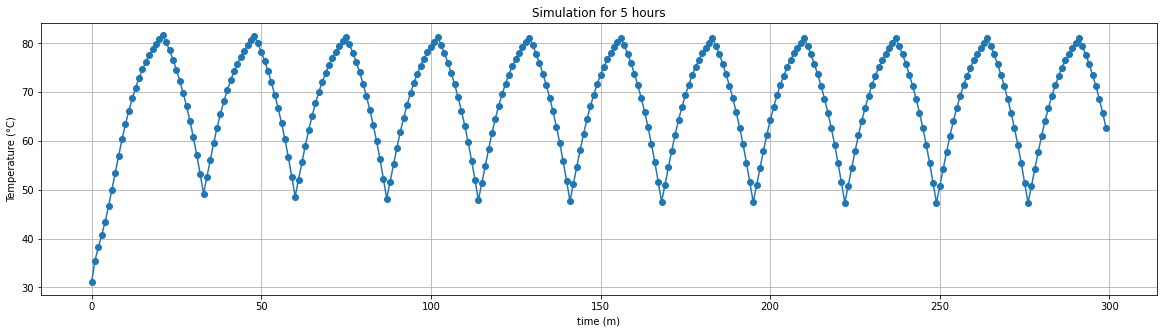

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(x, y, marker="o")

plt.xlabel("time (m)")
plt.ylabel("Temperature (°C)")
plt.title("Simulation for 5 hours")

plt.grid(True)
plt.show()